# ***Neural Network Assignment***

1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
Answer:

* Deep Learning is a subset of Machine Learning that uses artificial neural networks with multiple hidden layers to automatically learn hierarchical representations of data. It is inspired by the structure and functioning of the human brain.

* Evolution of Deep Learning:
    * 1950s–60s: Perceptron introduced by Frank Rosenblatt

    * 1980s: Backpropagation algorithm popularized

    * 2000s: Increase in data availability and GPU computing

    * 2012 onwards: Breakthroughs in image recognition (AlexNet), NLP, speech recognition

* Difference between Traditional ML and Deep Learning:

| Aspect                           | Traditional ML | Deep Learning        |
| -------------------------------- | -------------- | -------------------- |
| Feature Engineering              | Manual         | Automatic            |
| Data Requirement                 | Small–Medium   | Very Large           |
| Model Complexity                 | Simple models  | Deep neural networks |
| Performance on unstructured data | Limited        | Excellent            |
| Interpretability                 | High           | Low                  |

2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

* A Perceptron is the simplest type of artificial neural network used for binary classification.

* Architecture:

    * Input layer (features)

    * Weights assigned to inputs

    * Bias term

    * Activation function (usually step function)

* Functioning:

    * Inputs are multiplied by weights

    * Weighted sum is calculated

    * Bias is added

    * Activation function determines output (0 or 1)
    * 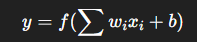

* Limitations:

    * Can only solve linearly separable problems

    * Cannot solve XOR problem

    * No hidden layers

    * Limited learning capability

3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
* Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns.
* | Function | Formula        | Range  | Pros                  | Cons               |
| -------- | -------------- | ------ | --------------------- | ------------------ |
| Sigmoid  | (1/(1+e^{-x})) | (0,1)  | Smooth, probabilistic | Vanishing gradient |
| Tanh     | (\tanh(x))     | (-1,1) | Zero-centered         | Vanishing gradient |
| ReLU     | max(0, x)      | [0, ∞) | Fast, efficient       | Dead neurons       |


4. What is the difference between Loss function and Cost function in neural networks? Provide examples.
* Loss Function: Measures error for a single training example

* Cost Function: Average loss over the entire dataset

* Examples:

    * Mean Squared Error (MSE)

    * Binary Cross-Entropy

    * Categorical Cross-Entropy
    * 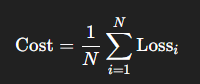

5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
* Optimizers update model weights to minimize the loss function.

    1. Gradient Descent (GD)

    * Updates weights using the same fixed learning rate for all parameters based on the gradient of the loss function.
    * 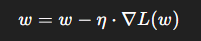

    * Characteristics:
    * Uses a global learning rate

    * Simple and easy to understand

    * Can be slow to converge

    * Sensitive to learning rate choice

    * Limitations:

    * Struggles with noisy or sparse data

    * Can get stuck in local minima or saddle points

    * Best suited for: Small datasets and convex optimization problems.

    2. RMSprop (Root Mean Square Propagation)
    * Adapts the learning rate for each parameter by dividing the gradient by a running average of squared gradients.
    * 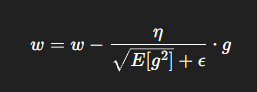

    * Characteristics:

    * Adaptive learning rate

    * Reduces oscillations in steep directions

    * Works well for non-stationary objectives

    * Advantages over Gradient Descent:

    * Faster convergence

    * Better handling of varying gradient magnitudes

    * Limitations:

    * No momentum term

    * Slightly sensitive to hyperparameters

    * Best suited for: Recurrent Neural Networks (RNNs) and problems with noisy gradients.

    3. Adam (Adaptive Moment Estimation)
    * Combines Momentum (first moment) and RMSprop (second moment) for adaptive and stable updates.
    * 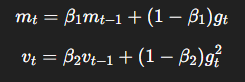

    * Characteristics:

    * Adaptive learning rate + momentum

    * Bias correction for stability
    * Fast and reliable convergence

    * Advantages:

    * Handles sparse gradients well

    * Less tuning required

    * Works well for large and complex datasets

    * Limitations:

    * Slightly higher memory usage

    * May generalize worse than SGD in some cases

    * Best suited for: Deep neural networks and real-world large-scale problems.



In [1]:
#Question 6: Implement a single-layer perceptron using NumPy to solve the AND gate

import numpy as np

# AND gate data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1

# Training
for epoch in range(10):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

print("Weights:", weights)
print("Bias:", bias)

# Testing
for x in X:
    output = np.dot(x, weights) + bias
    print(x, "->", 1 if output >= 0 else 0)


Weights: [0.2 0.1]
Bias: -0.20000000000000004
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


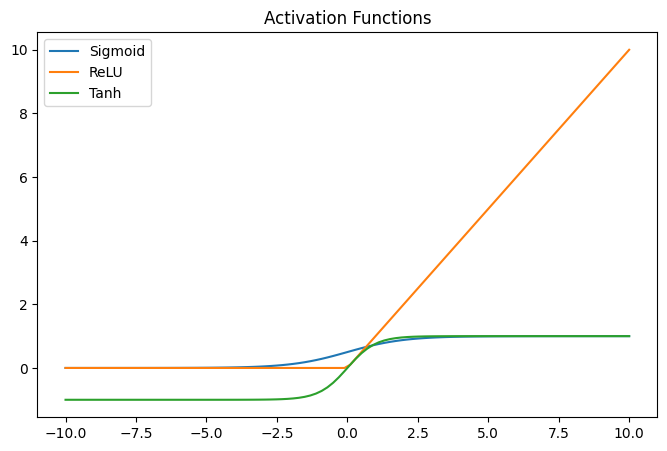

In [2]:
#Question 7: Visualize Sigmoid, ReLU, and Tanh activation functions.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.figure(figsize=(8,5))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, relu, label='ReLU')
plt.plot(x, tanh, label='Tanh')
plt.legend()
plt.title("Activation Functions")
plt.show()


In [3]:
#Question 8: Build and train a simple neural network on MNIST dataset.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), _ = mnist.load_data()

X_train = X_train / 255.0
y_train = to_categorical(y_train)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=32)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8832 - loss: 0.4197
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9619 - loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9754 - loss: 0.0805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0425
Training Accuracy: 0.9856500029563904


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7731 - loss: 0.8311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8597 - loss: 0.3973
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8727 - loss: 0.3496
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8820 - loss: 0.3247
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8860 - loss: 0.3069


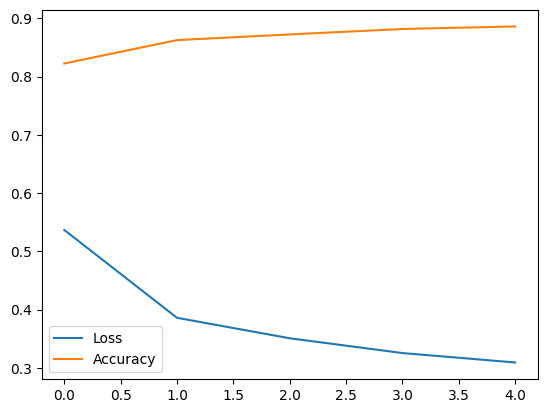

In [4]:
#Question 9: Visualize loss and accuracy curves for Fashion MNIST. Interpret training behavior.

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), _ = fashion_mnist.load_data()
X_train = X_train / 255.0
y_train = to_categorical(y_train)

history = model.fit(X_train, y_train, epochs=5)

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()


10. Fraud Detection – Real-Time Deep Learning Workflow

* Model Design

    * Multilayer Neural Network

* Input: transaction amount, merchant ID, location

    * Hidden layers with ReLU

    * Output layer with Sigmoid

* Activation & Loss

    * Activation: ReLU (hidden), Sigmoid (output)

    * Loss: Binary Cross-Entropy (binary classification)

* Handling Class Imbalance

    * Class weights

    * SMOTE

    * Precision, Recall, F1-score, ROC-AUC

    * Optimizer & Overfitting Prevention

* Optimizer: Adam

* Dropout, Early Stopping, L2 Regularization

In [8]:
# ================================
# 1. Imports
# ================================
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ================================
# 2. Create Synthetic Fraud Dataset
# ================================
# (Used because real banking data is confidential)

np.random.seed(42)

n_samples = 5000
n_features = 20

# Features
X = np.random.randn(n_samples, n_features)

# Highly imbalanced target (1% fraud)
y = np.zeros(n_samples)
fraud_indices = np.random.choice(n_samples, size=50, replace=False)
y[fraud_indices] = 1

# ================================
# 3. Train / Validation / Test Split
# ================================
# NOTE: No stratify to avoid class-size error

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# ================================
# 4. Build Multilayer Neural Network
# ================================
model = Sequential([
    Input(shape=(n_features,)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# ================================
# 5. Compile Model
# ================================
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Precision', 'Recall']
)

# ================================
# 6. Handle Class Imbalance
# ================================
class_weight = {
    0: 1.0,    # Legitimate
    1: 15.0    # Fraud (higher weight)
}

# ================================
# 7. Early Stopping
# ================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ================================
# 8. Train Model
# ================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)

# ================================
# 9. Evaluate Model
# ================================
print("\nModel Evaluation:")
results = model.evaluate(X_test, y_test)
print("Loss, Precision, Recall:", results)

# ================================
# 10. Detailed Metrics
# ================================
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - Precision: 0.0052 - Recall: 0.4350 - loss: 0.9440 - val_Precision: 0.0189 - val_Recall: 0.1111 - val_loss: 0.4915
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - Precision: 0.0167 - Recall: 0.2611 - loss: 0.6122 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.2937
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - Precision: 0.0054 - Recall: 0.0090 - loss: 0.5363 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.2107
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.4164 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.1723
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.4670 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.1575
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.3518 - val

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
